In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!ls

Lifting first test.csv  Punching first test.csv Untitled.ipynb


In [44]:
def get_fft(x,f_s=50):
    '''
    Function to convert raw timeseries signal to Fourier domain
    x:raw_signal
    f_s=sampling frequency if f_s=50 means sample 50 points per second from the temporal data
    
    plots a folded and scaled frequency plot of the signal
    and returns the frequency spectrum datframe of the signal
    '''
    
    n = len(x)
    fft_x = np.fft.fft(x) # gives the complex representation of each point

    # Find all the frequencies in the FFT
    freqs = np.fft.fftfreq(n, d=1/f_s)
    
    # Plot the folded and scaled frequency plot
    half_n = int(np.ceil(n/2.0))
    fft_x_half = (2.0 / n) * fft_x[:half_n]
    fft_x_half=np.abs(fft_x_half)
    freq_half = freqs[:half_n]
    plt.figure(figsize=(10,5))
    plt.plot(freq_half, fft_x_half)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.show()
    spectrum = pd.DataFrame({'frequency (Hz)': freq_half,'magnitude': fft_x_half,})
    return spectrum

In [6]:
data=pd.read_csv('Lifting first test.csv')

In [42]:
print(data.shape)
#data.head(20)
#data

#Ax1 大臂x轴上accelerometer的值
#Gy2 小臂上gyroscope上的值
#R 绕x轴的角度
#P 绕Y轴
#Y 绕z轴

(2319, 19)


In [71]:
# delete useless noisy data
#data=data[200:1700]

In [72]:
data.columns.values

array(['Time', ' Ax1', ' Ay1', ' Az1', ' Gx1', ' Gy1', ' Gz1', ' R1',
       ' P1', ' Y1', ' Ax2', ' Ay2', ' Az2', ' Gx2', ' Gy2', ' Gz2', ' R2',
       ' P2', ' Y2'], dtype=object)

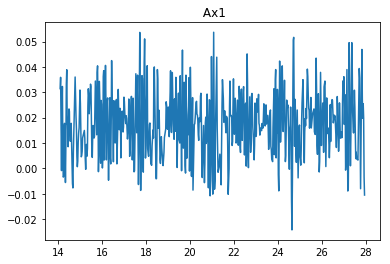

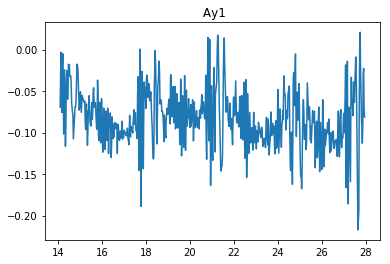

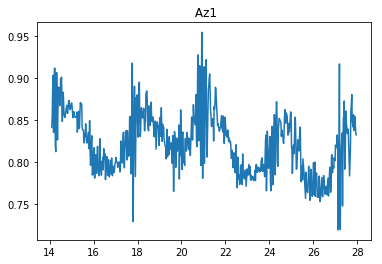

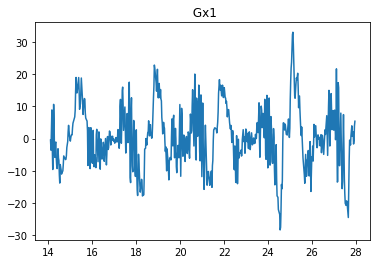

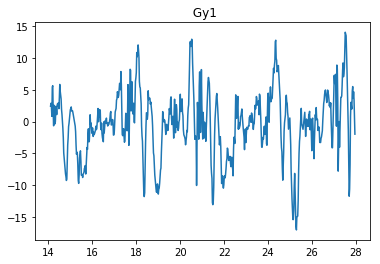

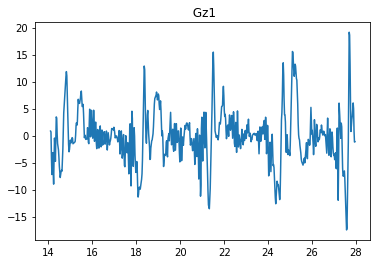

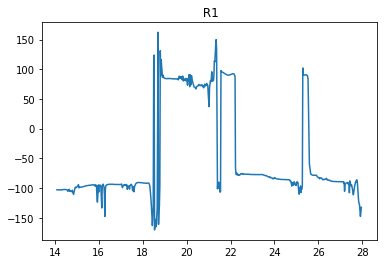

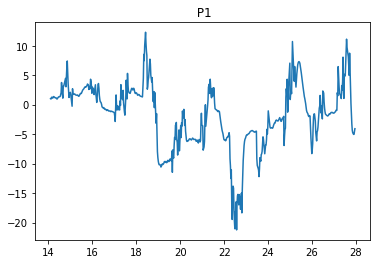

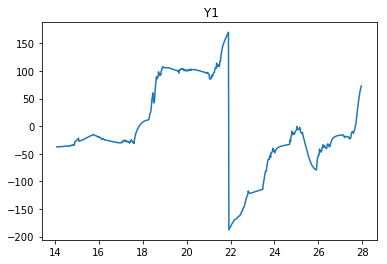

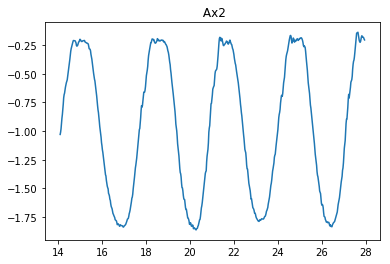

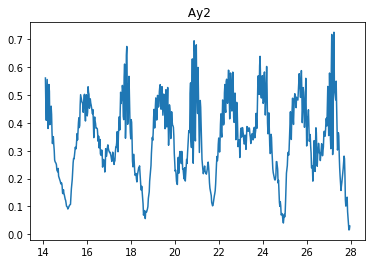

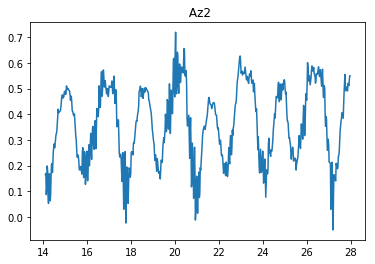

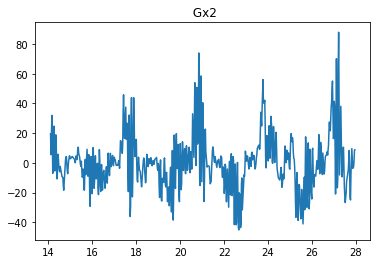

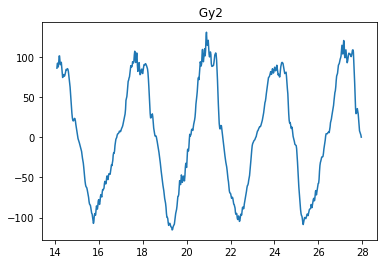

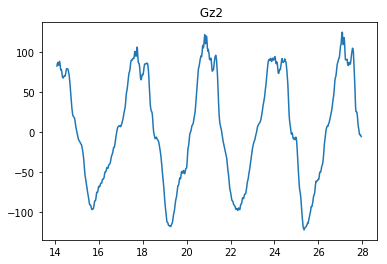

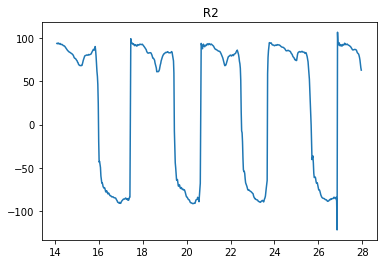

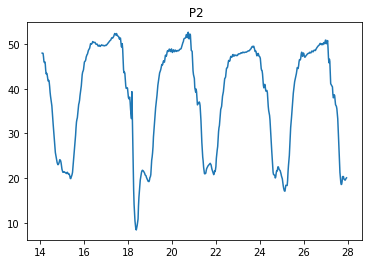

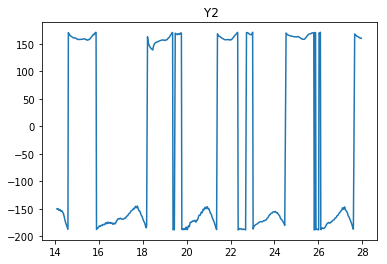

In [73]:
for i in range(1,len(data.columns.values)):
    #plt.subplot(221+i)
    plt.figure()
    plt.title(data.columns.values[i])
    plt.plot(data[data.columns.values[0]],data[data.columns.values[i]])
plt.show()

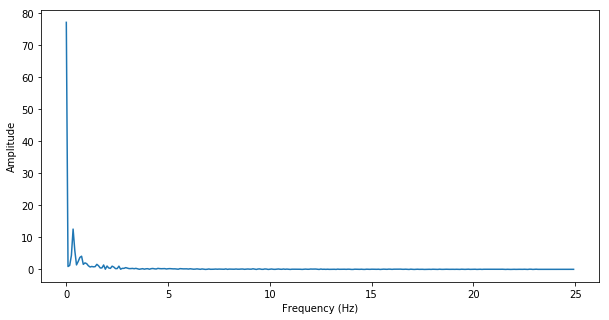

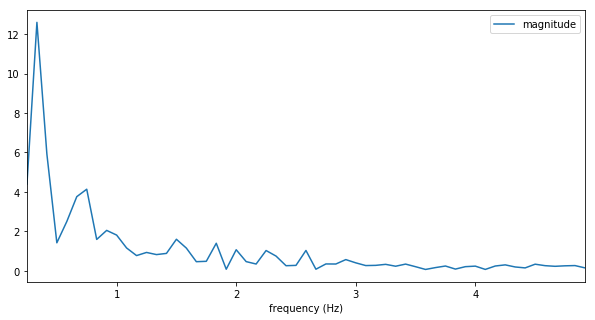

In [70]:
s=get_fft(data[' P2'])

s2=s[(s['frequency (Hz)']>0.2) &(s['frequency (Hz)']<5) ]
s2.plot(x='frequency (Hz)',figsize=(10,5))
plt.show()

In [67]:
data['Time'].head()

600    14.098
601    14.118
602    14.138
603    14.159
604    14.178
Name: Time, dtype: float64

50.0